This file briefly explores using Neural Nets to classify housing listings into three different interest levels. In finding the best model, there are several parameters that can be tuned (using sklearn). The first, and primary, parameter studied in this file is alpha, the regularization constant. Alpha is tuned using k-fold cross-validation with just three trials each, as more trials took a very long time (did not wait to complete). The results are spotty, as the optimal alphas varied depending on the number of layers used. Overall, it seems that alpha = .1 performed the best, which would suggest that there are a number of predictors in the dataset that are insignificant, perhaps. Nonetheless, the results of the cross valdiation were not positive, as even the best performing NN with alpha = a had an accuracy of less than 50% (worse than a dummy classifier). As a result, we decided to stop pursuing neural nets and instead focus on more promising models/paths.

In [1]:
from sklearn.neural_network import MLPClassifier

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

import requests as re

sns.set_context('poster')
sns.set_style('whitegrid')


from sklearn.tree import export_graphviz


#Trees
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

#Preprocessing packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer #One hot encoding
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

#Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Metrics
from sklearn.metrics import confusion_matrix, auc, roc_curve

import seaborn as sns
import matplotlib.pyplot as plt
 
from IPython.display import Image 

#Bootstrap
from sklearn.utils import resample

%matplotlib inline

In [4]:
data = pd.read_json("../rawData/cleaned.json")

In [6]:
train_init, test_init = train_test_split(data,test_size = .3,random_state = 42)

train = train_init.drop(['interest_level','interestVal','description','display_address','created','building_id','features', 'manager_id', 'street_address'], axis=1)
test = test_init.drop(['interest_level','interestVal','description','display_address','created','building_id','features', 'manager_id', 'street_address'], axis=1)
y_train = train_init['interest_level']
y_test = test_init['interest_level']

In [8]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()  
scaler.fit(train)  
train_transformed = scaler.transform(train)  
# apply same transformation to test data
test_transformed = scaler.transform(test)

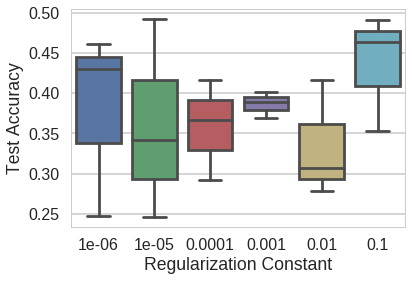

In [21]:
# Perform cross validation to tune the regularization constant

score = np.array([])# Array to store Misclassification Error
alphas = np.array([]) # Array to store tree depth

10.0 ** -np.arange(1, 7)

clf = MLPClassifier(solver='lbfgs',warm_start=True,hidden_layer_sizes=(5,5,5)) #Define model ot be used
for trial in range(3):
    cv_method = KFold(n_splits=10,shuffle=True) #Define CV method
    for a in 10.0** -np.arange(1,7):
        clf.set_params(alpha = a)
        alphas = np.append(alphas,a)
        error = np.mean(cross_val_score(clf,train,y_train,cv = cv_method,scoring = 'accuracy')) #Run cross validation
        score = np.append(score,error)
        
sns.boxplot(x = alphas,y = score)
plt.xlabel('Regularization Constant')
plt.ylabel('Test Accuracy')

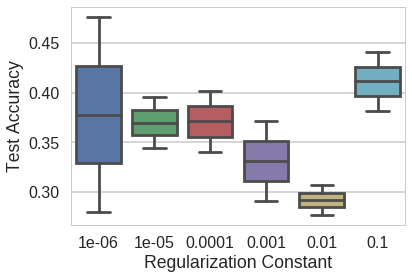

In [25]:
# Perform cross validation to tune the regularization constant

score = np.array([])# Array to store Misclassification Error
alphas = np.array([]) # Array to store tree depth

10.0 ** -np.arange(1, 7)

clf = MLPClassifier(solver='lbfgs',warm_start=True,hidden_layer_sizes=(10,10,10)) #Define model ot be used
for trial in range(2):
    cv_method = KFold(n_splits=10,shuffle=True) #Define CV method
    for a in 10.0** -np.arange(1,7):
        clf.set_params(alpha = a)
        alphas = np.append(alphas,a)
        error = np.mean(cross_val_score(clf,train,y_train,cv = cv_method,scoring = 'accuracy')) #Run cross validation
        score = np.append(score,error)
        
sns.boxplot(x = alphas,y = score)
plt.xlabel('Regularization Constant')
plt.ylabel('Test Accuracy')